In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import datetime as dt

In [2]:
# Satelite Data Extraction:
###############################################
############## DATA EXTRACTION ################
###############################################

## data extraction 
#model_data='/media/jenny/Wolverine/roms_avg_Y2007M1_3km.nc'
DIR='/home/jenny/Desktop/ModelAssessment/SST_1993_2019_mm.nc'
tindex=0
############## END OF USERS DEFINED VARS ######################################

inifile=DIR
print(inifile)
#dataset=open_url(inifile,timeout=tout)

/home/jenny/Desktop/ModelAssessment/SST_1993_2019_mm.nc


In [3]:
DS=xr.open_mfdataset(inifile)

In [4]:
DS

<xarray.Dataset>
Dimensions:       (time: 324, bnds: 2, lon: 1400, lat: 881)
Coordinates:
  * time          (time) datetime64[ns] 1993-01-16T12:00:00 ... 2019-12-16T12...
  * lon           (lon) float32 -9.975 -9.925 -9.875 ... 59.88 59.92 59.97
  * lat           (lat) float32 -50.03 -49.97 -49.92 ... -6.125 -6.075 -6.025
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(324, 2), meta=np.ndarray>
    analysed_sst  (time, lat, lon) float32 dask.array<chunksize=(324, 881, 1400), meta=np.ndarray>
Attributes: (12/57)
    CDI:                        Climate Data Interface version 1.9.9rc1 (http...
    Conventions:                CF-1.4, ACDD-1.3
    history:                    Tue Jul 13 13:28:19 2021: ncrcat SST_1993_mon...
    source:                     AMSR2-REMSS-L2P-v2.0, AMSRE-REMSS-L2P-v2.0, G...
    institution:                UKMO
    summary:                    A merged, multi-sensor L4 Foundation SST product
    ...                         ...
    geospatial_lon_min:         -9.975000381469727
    geospatial_lon_max:         59.974998474121094
    frequency:                  mon
    CDO:                        Climate Data Operators version 1.9.9rc1 (http...
    NCO:                        4.7.2
    nco_openmp_thread_number:   1

In [5]:
## extract the required variables
time_Sat=DS['time'].values
lon_Sat=DS['lon'].values
lat_Sat=DS['lat'].values
SST_Sat=DS['analysed_sst'].values - 273

In [7]:
lon_Sat

array([-9.975, -9.925, -9.875, ..., 59.875, 59.925, 59.975], dtype=float32)

In [8]:
temp=np.squeeze(SST_Sat)[:]


In [9]:
np.shape(temp)

(324, 881, 1400)

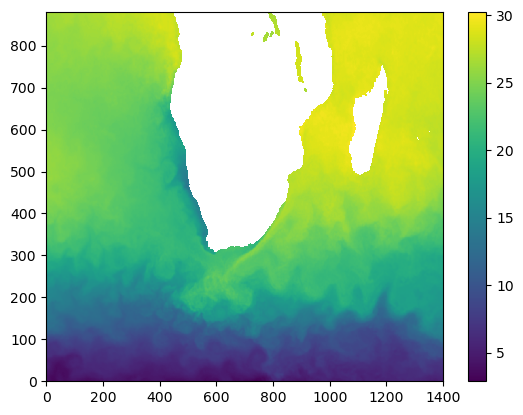

In [11]:
plt.pcolor(temp[1,:,:])
plt.colorbar()

In [6]:
#### Group by season
DS_season=DS.groupby("time.season").mean("time")
DS_season

<xarray.Dataset>
Dimensions:       (lon: 1400, lat: 881, season: 4)
Coordinates:
  * lon           (lon) float32 -9.975 -9.925 -9.875 ... 59.88 59.92 59.97
  * lat           (lat) float32 -50.03 -49.97 -49.92 ... -6.125 -6.075 -6.025
  * season        (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    analysed_sst  (season, lat, lon) float32 dask.array<chunksize=(1, 881, 1400), meta=np.ndarray>

In [7]:
DS_DJF=DS_season.sel(season='DJF')
DS_DJF

<xarray.Dataset>
Dimensions:       (lon: 1400, lat: 881)
Coordinates:
  * lon           (lon) float32 -9.975 -9.925 -9.875 ... 59.88 59.92 59.97
  * lat           (lat) float32 -50.03 -49.97 -49.92 ... -6.125 -6.075 -6.025
    season        <U3 'DJF'
Data variables:
    analysed_sst  (lat, lon) float32 dask.array<chunksize=(881, 1400), meta=np.ndarray>

In [ ]:
DJF =DS_DJF['analysed_sst'].values[:,:,:]
DJF

In [18]:
SST_Sat[j,:,:]

array([[ 3.9299927,  3.899994 ,  3.869995 , ...,  4.5799866,  4.5799866,
         4.5899963],
       [ 3.919983 ,  3.899994 ,  3.8599854, ...,  4.6099854,  4.600006 ,
         4.600006 ],
       [ 3.9299927,  3.899994 ,  3.8599854, ...,  4.630005 ,  4.619995 ,
         4.619995 ],
       ...,
       [25.769989 , 25.769989 , 25.75998  , ..., 28.539978 , 28.529999 ,
        28.519989 ],
       [25.779999 , 25.789978 , 25.779999 , ..., 28.529999 , 28.50998  ,
        28.5      ],
       [25.799988 , 25.809998 , 25.789978 , ..., 28.50998  , 28.47998  ,
        28.459991 ]], dtype=float32)

0
1
2
3


Text(0.5, 0.95, 'OSTIA Satellite "SST" climatological seasonality')

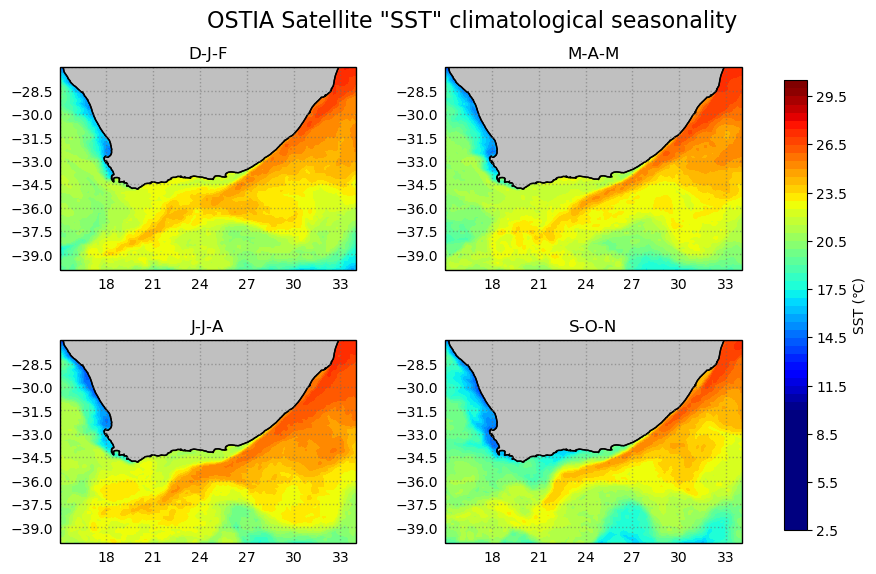

In [7]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import array

fname_path='/home/jenny/Desktop/ModelAssessment/Seasonal-Satalite-SSTs.png'
resol = '50m'

# Define the figure and each axis for the 3 rows and 3 columns
fig,ax = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,6.5))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
#img_extent = [20,34,-40,-28]


# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
ax=ax.flatten()
for j in range(4):
    print(j)
    ax[j].set_extent([15,34,-40,-27])
    image = ax[j].contourf(lon_Sat, lat_Sat, SST_Sat[j,:,:], 64,
                 transform=ccrs.PlateCarree(),
                           cmap='jet',vmin=10,vmax=30)    
    gl = ax[j].gridlines(crs=ccrs.PlateCarree(),draw_labels=True,
                         linewidth=1, color='dimgrey', alpha=0.5, linestyle=':')
    gl.xlabels_top = False
    gl.ylabels_right=False 
    ax[j].add_feature(land, facecolor='silver')
    ax[j].coastlines(resolution='10m', color='black', linestyle='-', alpha=1) 

    if j == 0:
      ax[j].set_title("D-J-F")
    elif j == 1:
      ax[j].set_title("M-A-M")
    elif j == 2:
      ax[j].set_title("J-J-A")
    else:
        ax[j].set_title("S-O-N")

#fig.tight_layout()
fig.subplots_adjust(wspace=0.3,hspace=0.2) 
cbar = fig.colorbar(image, ax=ax, shrink=0.9)
cbar.set_label('SST (℃)')
fig.suptitle('OSTIA Satellite "SST" climatological seasonality', x=0.5,y=0.95,fontsize=16)
#plt.savefig(fname_path, dpi=300, facecolor='w', edgecolor='w',figsize=(12,6),
#    orientation='landscape', papertype=None, format=None,
#    transparent=True, bbox_inches=None, pad_inches=None,
#    frameon=None)

In [15]:
np.shape(SST_Sat)

(324, 881, 1400)